In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Harsh Kapoor\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data PreProcessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Feature Engineering

In [4]:
Gender = pd.get_dummies(df['sex'], drop_first = True)
df = pd.concat([df, Gender], axis = 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [5]:
Smoker = pd.get_dummies(df['smoker'], drop_first = True)
df = pd.concat([df, Smoker], axis = 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [6]:
Region = pd.get_dummies(df['region'], drop_first = True)
df = pd.concat([df, Region], axis = 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [7]:
df = df.rename(columns = {'yes' : 'Smoker'})
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


# <u>Exploratory Analysis</u>

## <font color = 'red'>Distribution of Sex parameter</font>

In [8]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

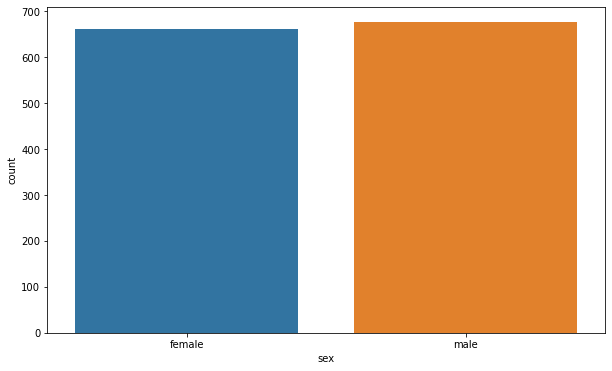

In [9]:
plt.figure(figsize = (10,6))
sns.countplot(x = df['sex'])

## <font color = 'red'>Relationship of smoking and Gender w.r.t. Charges</font>

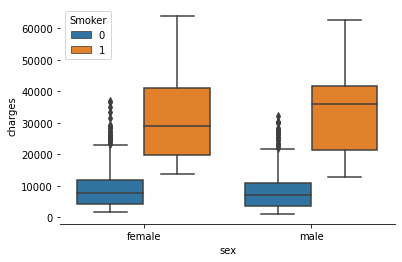

In [10]:
# plt.figure(figsize = (10,6))
sns.boxplot(x = df['sex'], y = df['charges'], hue = df['Smoker'])
sns.despine(left = True)

<AxesSubplot:xlabel='age', ylabel='charges'>

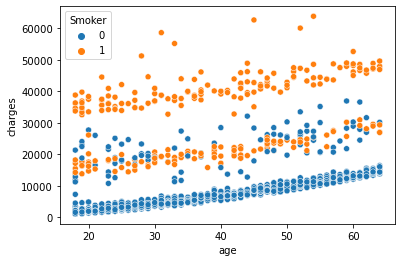

In [11]:
sns.scatterplot(x = df['age'], y = df['charges'], hue = df['Smoker'])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

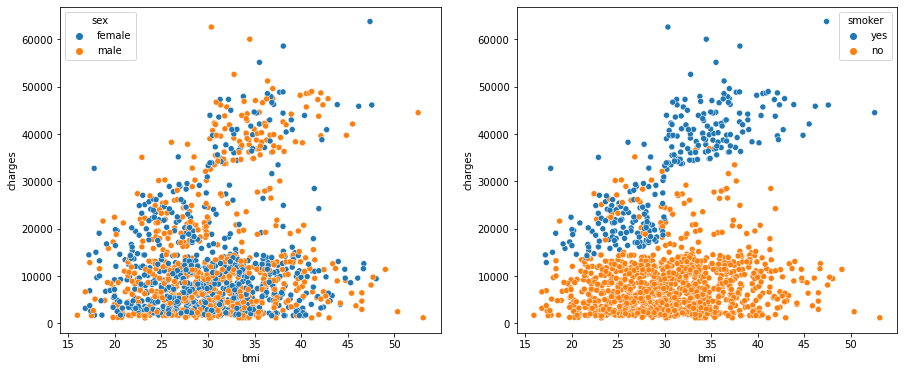

In [12]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
sns.scatterplot(x = df['bmi'], y = df['charges'], hue = df['sex'], ax = ax[0])
sns.scatterplot(x = df['bmi'], y = df['charges'], hue = df['smoker'], ax = ax[1])

In [13]:
df.drop(['sex', 'smoker', 'region'], axis = 1, inplace = True)
df.head()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<AxesSubplot:>

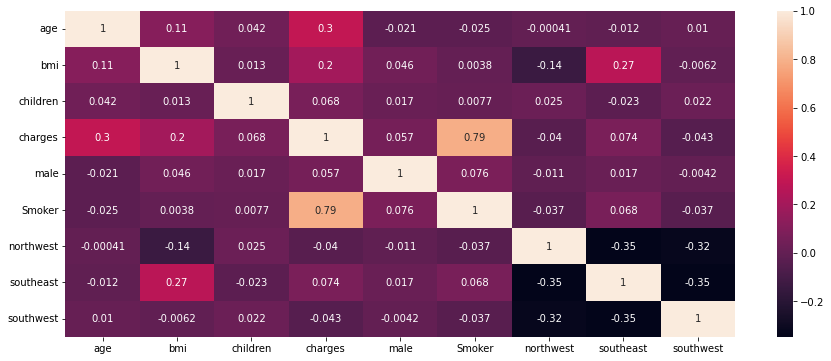

In [14]:
plt.figure(figsize = (15,6))
sns.heatmap(df.corr(), annot = True)

# Training-Testing

In [15]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4) 

In [17]:
x_train.shape

(802, 8)

## Scaling the data

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)
scaled_x_test.shape

(536, 8)

# Support Vector Regression Model

In [28]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(scaled_x_train, y_train)

SVR()

In [29]:
y_pred = regressor.predict(scaled_x_test)
y_pred.shape

(536,)

In [30]:
y_pred[:10]

array([9645.37034382, 9632.83282863, 9651.5234004 , 9593.6690608 ,
       9627.32656457, 9590.42926014, 9617.4248167 , 9589.38860215,
       9586.02815128, 9588.90888506])

In [31]:
y_test[:10]

261    17085.26760
748     8556.90700
323    11566.30055
385     1261.85900
403    10269.46000
938     2304.00220
729     6781.35420
469     2201.09710
526    24059.68019
452     1969.61400
Name: charges, dtype: float64

In [32]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, y_test)

161908989.93726406

C:\Users\Harsh Kapoor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Predict')

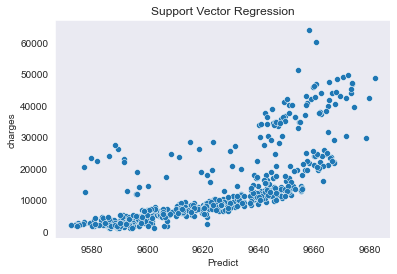

In [35]:
sns.set_style('dark')

f = sns.scatterplot(y_pred,y_test)

f.set_title('Support Vector Regression')
f.set_xlabel('Predict')

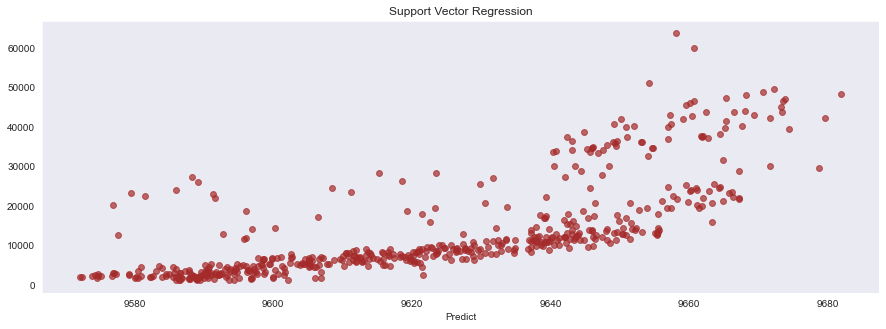

In [42]:
plt.figure(figsize = (15,5))

plt.scatter(y_pred, y_test, c = 'brown', s = 35, alpha = .7)

plt.title('Support Vector Regression')
plt.xlabel('Predict')
plt.show()